In [78]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## DataFrame

In [77]:
melbourne_data = pd.read_csv("/home/dockeruser/df/Melbourne_housing_extra_data-18-08-2017.csv")
filtered_melbourne_data = melbourne_data.dropna(axis=0)
melbourne_df = pd.DataFrame(filtered_melbourne_data)
melbourne_df


#melbourne_data.columns
#melbourne_data = pd.DataFrame(melbourne_data)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.00,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4019.0
24,Abbotsford,40 Nicholson St,3,h,1350000.0,VB,Nelson,12/11/2016,2.5,3067.0,...,2.0,2.0,214.0,190.00,2005.0,Yarra,-37.80850,144.99640,Northern Metropolitan,4019.0
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,94.00,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0
30,Abbotsford,16 William St,2,h,1310000.0,S,Jellis,15/10/2016,2.5,3067.0,...,1.0,2.0,238.0,97.00,1890.0,Yarra,-37.80900,144.99760,Northern Metropolitan,4019.0
32,Abbotsford,42 Henry St,3,h,1200000.0,S,Jellis,16/07/2016,2.5,3067.0,...,2.0,1.0,113.0,110.00,1880.0,Yarra,-37.80560,144.99300,Northern Metropolitan,4019.0


In [96]:
le = preprocessing.LabelEncoder()
le.fit(list(melbourne_df["Type"]))
new_type = le.transform(list(melbourne_df["Type"]))

melbourne_df["new_type"] = new_type

In [97]:
le.fit(list(melbourne_df["Method"]))
new_method = le.transform(list(melbourne_df["Method"]))
melbourne_df["new_method"] = new_method

In [98]:
melbourne_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,new_type,new_method
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,0,1
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,0,3
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,0,4
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0,0,1
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0,0,1
18,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,220.0,75.00,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4019.0,0,1
24,Abbotsford,40 Nicholson St,3,h,1350000.0,VB,Nelson,12/11/2016,2.5,3067.0,...,214.0,190.00,2005.0,Yarra,-37.80850,144.99640,Northern Metropolitan,4019.0,0,4
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,...,0.0,94.00,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0,2,1
30,Abbotsford,16 William St,2,h,1310000.0,S,Jellis,15/10/2016,2.5,3067.0,...,238.0,97.00,1890.0,Yarra,-37.80900,144.99760,Northern Metropolitan,4019.0,0,1
32,Abbotsford,42 Henry St,3,h,1200000.0,S,Jellis,16/07/2016,2.5,3067.0,...,113.0,110.00,1880.0,Yarra,-37.80560,144.99300,Northern Metropolitan,4019.0,0,1


In [99]:
melbourne_predictors = ['Rooms','new_type', 'new_method', 'Distance', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'Lattitude', 'Longtitude', 'Propertycount']
melbourne_predictors_df = melbourne_df[melbourne_predictors]


melbourne_response_df = melbourne_df["Price"]

In [11]:
# Filter rows with missing values
#filtered_melbourne_data = melbourne_data.dropna(axis=0) #Missing value remove

#melbourne_target = filtered_melbourne_data.Price
#melbourne_predictors_data = filtered_melbourne_data[melbourne_predictors]

## Cross validation

In [100]:
melb_predictors_train, melb_predictors_val, melb_resp_train, melb_resp_val = train_test_split(melbourne_predictors_df, 
                                                                                              melbourne_response_df, test_size = 0.2,
                                                                                              random_state = 0)

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [56]:
help(np.asmatrix)

Help on function asmatrix in module numpy.matrixlib.defmatrix:

asmatrix(data, dtype=None)
    Interpret the input as a matrix.
    
    Unlike `matrix`, `asmatrix` does not make a copy if the input is already
    a matrix or an ndarray.  Equivalent to ``matrix(data, copy=False)``.
    
    Parameters
    ----------
    data : array_like
        Input data.
    dtype : data-type
       Data-type of the output matrix.
    
    Returns
    -------
    mat : matrix
        `data` interpreted as a matrix.
    
    Examples
    --------
    >>> x = np.array([[1, 2], [3, 4]])
    
    >>> m = np.asmatrix(x)
    
    >>> x[0,0] = 5
    
    >>> m
    matrix([[5, 2],
            [3, 4]])



## EDA

## Decision Tree

In [17]:
def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [40]:
max_leaf_nodes = np.array([5, 50, 400, 500, 600, 700, 800, 900, 1000, 5000])
for max_leaf_nodes in max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, melb_predictors_train, melb_predictors_val, melb_targ_train, melb_targ_val)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  257829
Max leaf nodes: 400  		 Mean Absolute Error:  242632
Max leaf nodes: 500  		 Mean Absolute Error:  243176
Max leaf nodes: 600  		 Mean Absolute Error:  243667
Max leaf nodes: 700  		 Mean Absolute Error:  242886
Max leaf nodes: 800  		 Mean Absolute Error:  243983
Max leaf nodes: 900  		 Mean Absolute Error:  246232
Max leaf nodes: 1000  		 Mean Absolute Error:  247286
Max leaf nodes: 5000  		 Mean Absolute Error:  254915
Max leaf nodes : 5000 		 Minimum Mean Absolute Error: 254915


In [43]:
import StringIO
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier

In [44]:
def draw_decision_tree(classifier):
    dot_buf = StringIO.StringIO() 
    export_graphviz(classifier, out_file=dot_buf, feature_names=iris.feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)

In [ ]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=400, random_state=0).fit(X, y)

## Random Forest

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot

In [114]:
mseOos = []
nTreeList = range(50, 500, 10)
for nTrees in nTreeList:
    depth = 6
    maxFeat = 3 #조정
    Melbourne_RFModel = ensemble.RandomForestRegressor(n_estimators=nTrees, max_depth=depth, max_features=maxFeat, random_state=531)
    Melbourne_RFModel.fit(melb_predictors_train, melb_resp_train)
    #데이터 세트에 대한 MSE 누적
    prediction = Melbourne_RFModel.predict(melb_predictors_val)
    mseOos.append(mean_squared_error(melb_resp_val, prediction))

In [113]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble.forest:

class RandomForestRegressor(ForestRegressor)
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and use averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion, and "mae" for the mean
 |      absolute 

In [110]:
print("MSE")
print(mseOos[-1])

MSE
148657694675.0


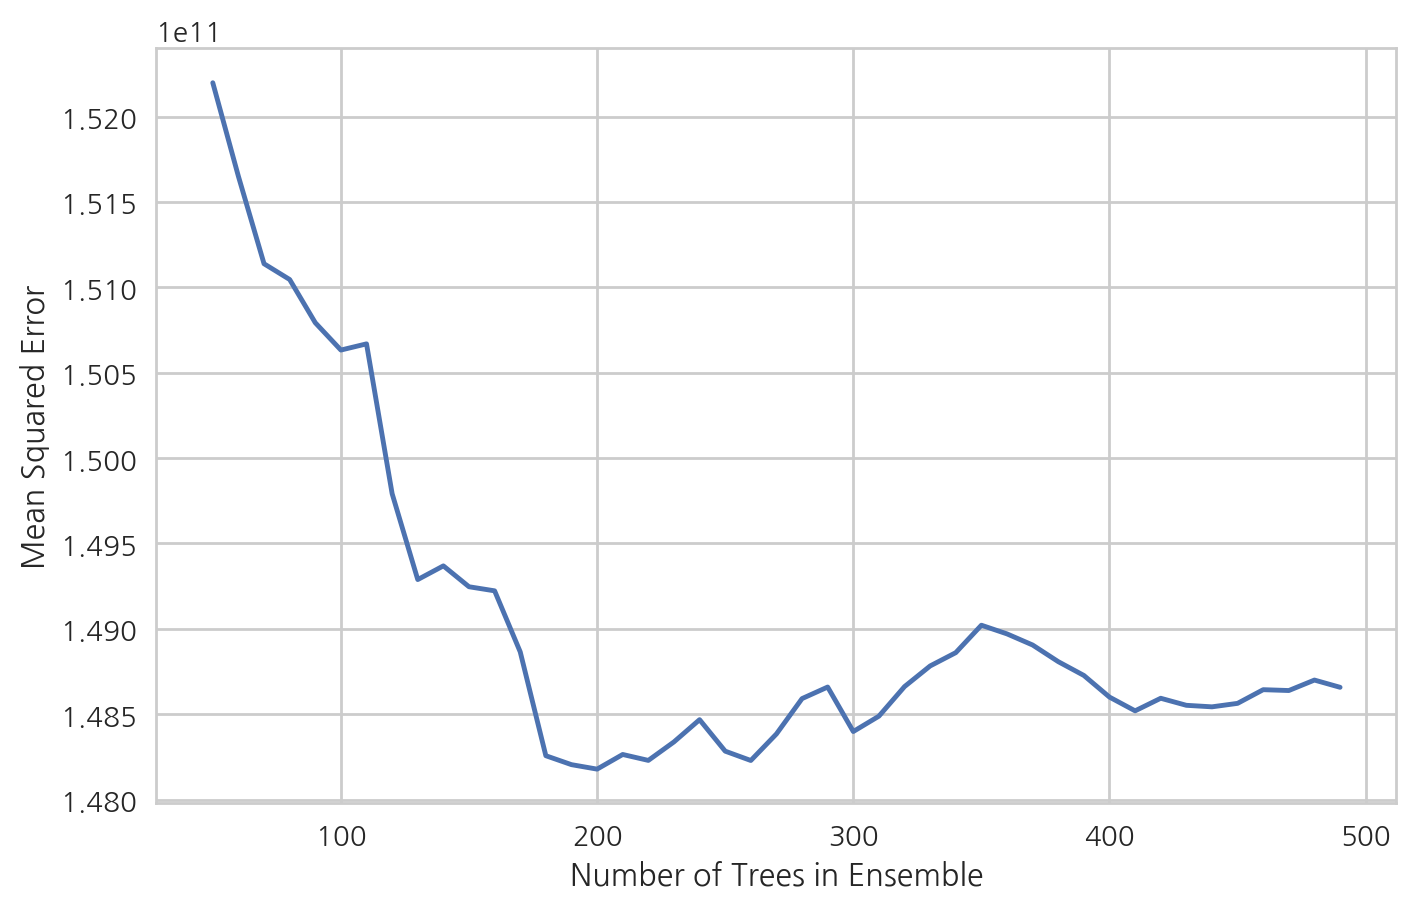

TypeError: only integer scalar arrays can be converted to a scalar index

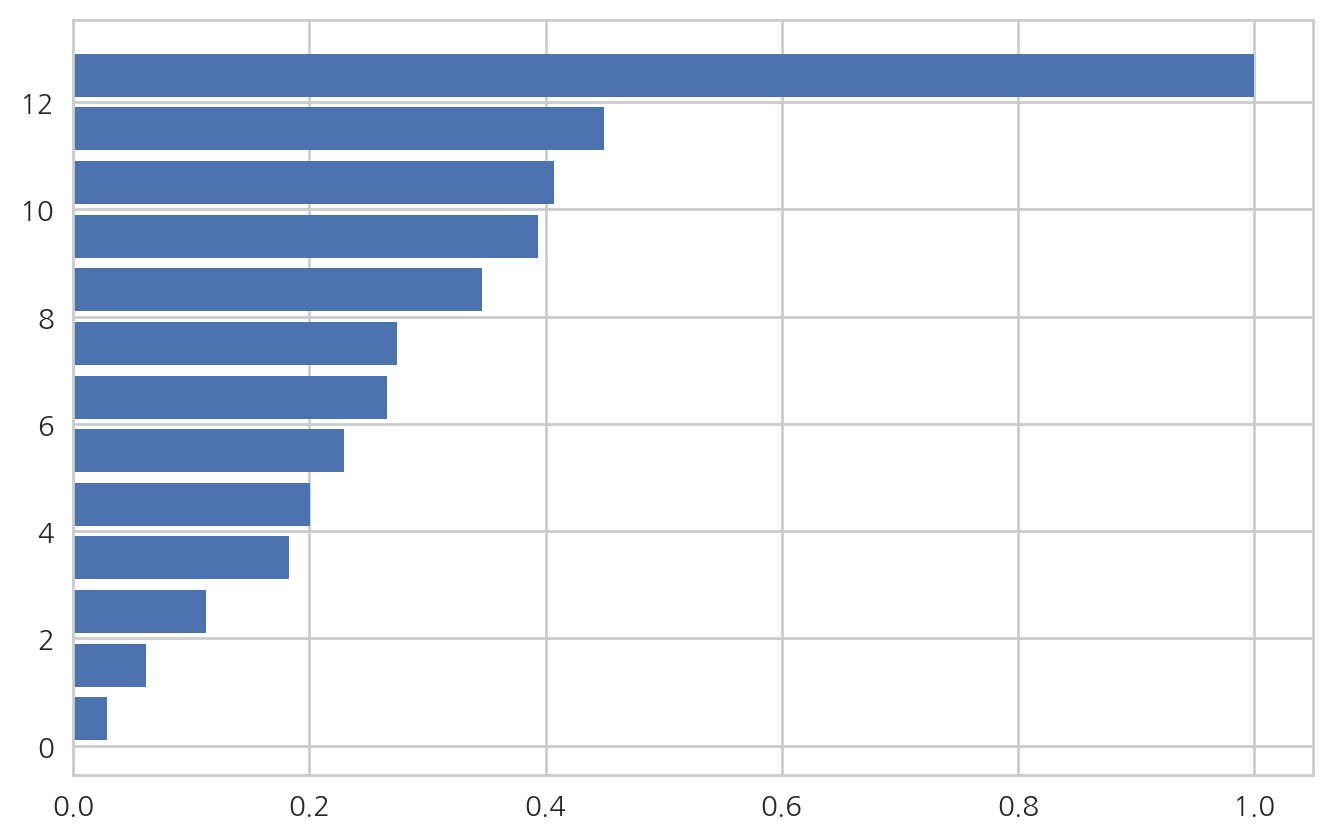

In [111]:
plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()
 
#피처 중요도 도표 그리기
featureImportance = wineRFModel.feature_importances_
 
#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, melbourne_predictors[sorted_idx])
plot.xlabel('Variable Importance')
plot.show()